In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

%matplotlib inline
from tensorflow import keras
K = keras.backend

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
data_path = os.getcwd()
csv_path = os.path.join(data_path, 'guard_data.csv')

guard_data = pd.read_csv(csv_path)

In [5]:
guard_data.head()

,ID,Player,Tm,Year End,Rk,Pos,Pos_Rev,All NBA TEAM Yes / No,All NBA Team,Age,...,ORB_PerGame,DRB_PerGame,TRB_PerGame,AST_PerGame,STL_PerGame,BLK_PerGame,TOV_PerGame,PF_PerGame,PS/G_PerGame,Which Team
0,1,Allen Leavell,HOU,1989,179,SG,SG,No,NaN,31,...,0.2,0.7,1.0,2.3,0.5,0.1,1.1,1.1,3.3,0
1,2,Alvin Robertson,SAS,1989,257,SG,SG,No,NaN,26,...,2.4,3.5,5.9,6.0,3.0,0.6,3.6,4.0,17.3,0
2,3,Andre Turner,MIL,1989,316,PG,PG,No,NaN,24,...,0.0,0.8,0.8,0.0,0.5,0.0,1.0,0.5,1.5,0
3,4,Anthony Bowie,SAS,1989,29,SG,SG,No,NaN,25,...,1.4,1.7,3.1,1.6,1.0,0.2,1.2,2.4,8.6,0
4,5,Anthony Jones,TOT,1989,157,SG,SG,No,NaN,26,...,0.4,0.4,0.8,0.5,0.3,0.1,0.2,0.6,2.3,0


In [6]:
X_guard_data = guard_data[['Year End', 'PS/G_PerGame', 'AST_PerGame', 'ORB_PerGame', 'DRB_PerGame', 'STL_PerGame', 'BLK_PerGame', 'TOV_PerGame', 'G', '3P%_Total', '2P%_Total', 'TS%_ADV', 'USG%_ADV', 'OWS_ADV', 'DWS_ADV', 'OBPM_ADV', 'DBPM_ADV', 'VORP_ADV', 'ORtg_Per100', 'DRtg_Per100']]

In [7]:
X_guard_data.head()

,Year End,PS/G_PerGame,AST_PerGame,ORB_PerGame,DRB_PerGame,STL_PerGame,BLK_PerGame,TOV_PerGame,G,3P%_Total,2P%_Total,TS%_ADV,USG%_ADV,OWS_ADV,DWS_ADV,OBPM_ADV,DBPM_ADV,VORP_ADV,ORtg_Per100,DRtg_Per100
0,1989,3.3,2.3,0.2,0.7,0.5,0.1,1.1,55,0.122,0.408,0.417,17.7,0.0,1.2,-2.3,1.8,0.3,123.0,104
1,1989,17.3,6.0,2.4,3.5,3.0,0.6,3.6,65,0.200,0.497,0.523,22.2,0.5,0.4,-0.9,-2.0,-0.1,107.0,106
2,1989,1.5,0.0,0.0,0.8,0.5,0.0,1.0,4,NaN,0.500,0.500,31.9,1.1,0.8,0.1,-2.4,-0.1,89.0,106
3,1989,8.6,1.6,1.4,1.7,1.0,0.2,1.2,18,0.200,0.511,0.515,15.3,-0.4,1.4,-3.2,0.2,-0.3,96.0,91
4,1989,2.3,0.5,0.4,0.4,0.3,0.1,0.2,33,0.250,0.397,0.442,20.1,0.4,0.4,-1.6,-0.9,-0.1,110.0,109


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_guard_data)
X_mean = scaler.mean_
X_std = scaler.scale_

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [10]:
imputer.fit(X_guard_data)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [11]:
X_guard_data.shape

(4789, 20)

## TF Data

In [12]:
defs = np.append(imputer.statistics_, 0)

In [13]:
my_batch_size = 32

In [14]:
csv_path = os.path.join(data_path, 'guard_data.csv')

dataset = tf.data.experimental.make_csv_dataset(csv_path, batch_size = my_batch_size,
                                               select_columns = ['Year End', 'PS/G_PerGame', 'AST_PerGame', 'ORB_PerGame', 'DRB_PerGame', 'STL_PerGame', 'BLK_PerGame', 'TOV_PerGame', 'G', '3P%_Total', '2P%_Total', 'TS%_ADV', 'USG%_ADV', 'OWS_ADV', 'DWS_ADV', 'OBPM_ADV', 'DBPM_ADV', 'VORP_ADV', 'ORtg_Per100', 'DRtg_Per100', 'Which Team'],
                                               column_defaults = defs)

W0912 07:47:21.667040  9828 deprecation.py:323] From C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\tensorflow\python\data\util\random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0912 07:47:21.676036  9828 deprecation.py:323] From C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\tensorflow\python\data\experimental\ops\readers.py:498: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
W0912 07:47:21.736999  9828 deprecation.py:323] From C:\Users\Bakhtiyar\Anaconda3\lib\site-packa

In [15]:
full_dataset_size = 4789

In [16]:
train_size = int(0.7 * full_dataset_size)
valid_size = int(0.15 * full_dataset_size)
test_size = int(0.15 * full_dataset_size)

#full_dataset = tf.data.TFRecordDataset(FLAGS.input_file)
dataset = dataset.shuffle(500)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
valid_dataset = test_dataset.skip(valid_size)
test_dataset = test_dataset.take(test_size)

In [17]:
@tf.function
def preprocess(data):
    #x = list(data.values())[:-1]
    #y = [data['Which Team']]
    #x = tf.stack(x)
    #y = tf.stack(y)
    x = tf.transpose(tf.stack(list(data.values())[:-1]))
    #x = tf.stack(list(data.values())[:-1]).transpose()
    y = tf.transpose((tf.stack([data['Which Team']])))
    return (x - X_mean) / X_std, y
    #return (x - np.array([X_mean] * my_batch_size).T) / np.array([X_std] * my_batch_size).T, y
    #return (x - X_mean) / X_std, y

In [18]:
valid_dataset = valid_dataset.map(preprocess).prefetch(100)

In [19]:
valid_dataset.take(1)

<TakeDataset shapes: ((32, 20), (32, 1)), types: (tf.float64, tf.float64)>

In [20]:
for X_batch, y_batch in valid_dataset.take(1):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 1.22907236e+00  8.50121132e+00 -1.13640495e+00 -1.26177240e-01
  -1.15194194e+00  4.62633247e+01 -2.69145297e+00 -1.41801866e+00
  -2.39027402e+00 -4.09120135e+00 -7.36889392e+00  1.03041126e+03
   1.83365656e+01 -3.54481043e-01  1.34567745e+00  1.71416788e+00
   8.01775912e-01 -2.69065522e-01 -6.12023117e+00 -1.94814575e+01]
 [-1.39452990e-01  7.83673359e+00 -1.16947219e+00 -1.31023361e-01
  -1.18844344e+00  3.71507699e+01 -4.98984246e+00  6.96316256e-01
   2.91755546e-01  1.94784406e-01  9.98860507e-02  1.27771713e+03
   1.77336912e+01 -2.05104931e-01  5.53635504e-01  8.78629009e-01
   4.93420722e-01 -3.46526623e-01 -6.18854329e+00 -1.98944586e+01]
 [-5.12687175e-01  6.67389757e+00 -1.12185537e+00 -1.84330689e-01
  -1.19218719e+00  3.20249579e+01  7.56131269e-01 -1.18309256e+00
  -2.20613467e+00 -2.33901991e+01 -7.36889392e+00  1.30127007e+03
   1.75327331e+01 -3.54481043e-01  1.34567745e+00  1.52549781e+00
   1.02202962e+00 -2.69065522e-01 -6.13886175e+00 -1.946080

In [21]:
train_dataset = train_dataset.map(preprocess).prefetch(100)

### Create panda datasets

In [525]:
selected_guard_data =  guard_data[['Year End', 'PS/G_PerGame', 'AST_PerGame', 'ORB_PerGame', 'DRB_PerGame', 'STL_PerGame', 'BLK_PerGame', 'TOV_PerGame', 'G', '3P%_Total', '2P%_Total', 'TS%_ADV', 'USG%_ADV', 'OWS_ADV', 'DWS_ADV', 'OBPM_ADV', 'DBPM_ADV', 'VORP_ADV', 'ORtg_Per100', 'DRtg_Per100', 'Which Team']]

In [526]:
# split 70%-15%-15%
train_set, valid_set = np.split(selected_guard_data.sample(frac=1), [int(.7*len(selected_guard_data))])

In [527]:
len(valid_set)

1437

In [528]:
# split sets 70%-15%-15%, stratified with regards to column "Which Team"
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, remain_index in split.split(selected_guard_data, selected_guard_data["Which Team"]):
    train_set = selected_guard_data.iloc[train_index]
    remain_set = selected_guard_data.iloc[remain_index]

In [529]:
train_set["Which Team"].value_counts()

0    3233
3      40
1      40
2      39
Name: Which Team, dtype: int64

In [530]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for valid_index, test_index in split.split(remain_set, remain_set["Which Team"]):
    valid_set = remain_set.iloc[valid_index]
    test_set = remain_set.iloc[test_index]

In [531]:
X_train, y_train = train_set.drop(columns = ['Which Team']), train_set['Which Team']
X_valid, y_valid = valid_set.drop(columns = ['Which Team']), valid_set['Which Team']
X_test, y_test = test_set.drop(columns = ['Which Team']), test_set['Which Team']

In [532]:
X = imputer.transform(X_train)

In [533]:
X_train = pd.DataFrame(X, columns=X_train.columns,
                          index=X_train.index)

In [534]:
X = imputer.transform(X_valid)
X_valid = pd.DataFrame(X, columns=X_valid.columns,
                          index=X_valid.index)

In [535]:
X_train = (X_train - X_mean) / X_std

In [536]:
X_train.head()

,Year End,PS/G_PerGame,AST_PerGame,ORB_PerGame,DRB_PerGame,STL_PerGame,BLK_PerGame,TOV_PerGame,G,3P%_Total,2P%_Total,TS%_ADV,USG%_ADV,OWS_ADV,DWS_ADV,OBPM_ADV,DBPM_ADV,VORP_ADV,ORtg_Per100,DRtg_Per100
1840,-0.388276,-1.249999,-0.983414,-1.289246,-1.395285,-1.577588,-0.967661,-1.300556,-2.070032,-2.482952,-2.527381,-3.562793,0.069473,0.143439,0.078410,0.231760,0.405319,-0.191604,0.884867,-0.648607
2907,0.358193,-0.153611,-0.939324,-0.320022,-0.365756,-0.438518,0.756131,-0.360851,0.972271,0.508393,0.547324,0.429430,0.712539,-0.603441,-0.872040,-0.253391,0.273167,-0.423988,-0.108764,0.177395
3219,0.607015,-1.299835,-1.292041,-1.289246,-0.740130,-1.577588,-0.967661,-1.652945,-2.110062,0.194784,-2.206143,-2.973970,-0.111390,-0.155313,-0.792836,0.339572,-0.563797,-0.501449,0.263847,-0.855108
3597,0.855838,-0.286507,-0.895235,-0.320022,0.570180,-0.628363,-0.393063,-0.948166,-0.348729,0.436022,-0.313134,0.005477,-0.653977,-0.653233,-0.951244,-0.469014,-1.532913,-0.656371,-0.916089,1.003397
1086,-0.885921,0.660374,1.794234,0.406896,0.663774,1.080241,-0.393063,1.753484,0.932240,0.468187,-0.014842,0.547195,0.190048,-0.454065,-0.476019,-0.334250,1.330385,-0.191604,0.512255,0.383895


In [537]:
X_valid = (X_valid - X_mean) / X_std
#X_test = (X_test - X_mean) / X_std

## Create model architecture

In [538]:
my_optimizer = keras.optimizers.Nadam(0.001)

In [539]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal", input_shape=X_guard_data.shape[1:]),
    keras.layers.AlphaDropout(rate=0.15),                             
    keras.layers.Dense(50, activation="selu",
                                 kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.15),                
    keras.layers.Dense(4, activation="softmax"),
])

In [540]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=my_optimizer,
              metrics=['accuracy'])

In [38]:
train_set['Which Team'].value_counts()

0    3233
3      40
1      40
2      39
Name: Which Team, dtype: int64

In [39]:
len(train_set)

3352

In [40]:
122/3352
# 3.6% of non-0 team. So naive classifier should get 96.4% right

0.03639618138424821

### Finding optimal Learning Rate

In [41]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.axis([10^-5, 10^1, 0, 0.1])

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=my_optimizer,
              metrics=['accuracy'])

Train on 3352 samples
Epoch 1/3
3352/3352 [==============================] - 1s 265us/sample - loss: 2.0182 - accuracy: 0.2479
Epoch 2/3
3352/3352 [==============================] - 0s 44us/sample - loss: 1.1829 - accuracy: 0.6113
Epoch 3/3
3352/3352 [==============================] - 0s 43us/sample - loss: 0.7731 - accuracy: 0.9478


C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


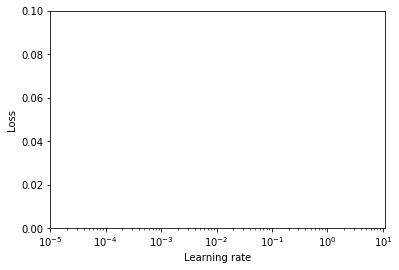

In [43]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=3, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [44]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (iter2 - self.iteration)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [541]:
# class weights to counter dataset imbalance
my_class_weights = {0:1, 1:30, 2:30, 3:30}
my_valid_weights = {0:1, 1:30, 2:30, 3:30}
valid_sample_weights = y_valid.replace(my_valid_weights).reset_index(drop = True)

In [542]:
batch_size = 32
n_epochs = 800
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.001)

In [543]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=200,
                                                  restore_best_weights=True)

## Train model

In [48]:
batch_size = 32
n_epochs = 2000

In [544]:
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid, valid_sample_weights),
                    callbacks= [early_stopping_cb, onecycle], class_weight = my_class_weights,
                                    )

Train on 3352 samples, validate on 718 samples
Epoch 1/800
3352/3352 [==============================] - 1s 437us/sample - loss: 3.0952 - accuracy: 0.4305 - val_loss: 2.4877 - val_accuracy: 0.6852
Epoch 2/800
3352/3352 [==============================] - 1s 164us/sample - loss: 2.4663 - accuracy: 0.6572 - val_loss: 2.4950 - val_accuracy: 0.7841
Epoch 3/800
3352/3352 [==============================] - 0s 129us/sample - loss: 2.1446 - accuracy: 0.7587 - val_loss: 1.8993 - val_accuracy: 0.8217
Epoch 4/800
3352/3352 [==============================] - 0s 125us/sample - loss: 1.8607 - accuracy: 0.8180 - val_loss: 1.7289 - val_accuracy: 0.8552
Epoch 5/800
3352/3352 [==============================] - 1s 153us/sample - loss: 1.8049 - accuracy: 0.8496 - val_loss: 1.6735 - val_accuracy: 0.8733
Epoch 6/800
3352/3352 [==============================] - 0s 138us/sample - loss: 1.6163 - accuracy: 0.8705 - val_loss: 1.6465 - val_accuracy: 0.8774
Epoch 7/800
3352/3352 [==============================] - 0s

3352/3352 [==============================] - 0s 146us/sample - loss: 0.7730 - accuracy: 0.9359 - val_loss: 2.0929 - val_accuracy: 0.9081
Epoch 56/800
3352/3352 [==============================] - 0s 121us/sample - loss: 0.7609 - accuracy: 0.9311 - val_loss: 2.2486 - val_accuracy: 0.9095
Epoch 57/800
3352/3352 [==============================] - 0s 135us/sample - loss: 0.7514 - accuracy: 0.9326 - val_loss: 2.1289 - val_accuracy: 0.9136
Epoch 58/800
3352/3352 [==============================] - 0s 142us/sample - loss: 0.7878 - accuracy: 0.9359 - val_loss: 2.2285 - val_accuracy: 0.9011
Epoch 59/800
3352/3352 [==============================] - 0s 122us/sample - loss: 0.7723 - accuracy: 0.9329 - val_loss: 2.3112 - val_accuracy: 0.9039
Epoch 60/800
3352/3352 [==============================] - 0s 124us/sample - loss: 0.7038 - accuracy: 0.9374 - val_loss: 2.3411 - val_accuracy: 0.9067
Epoch 61/800
3352/3352 [==============================] - 0s 140us/sample - loss: 0.7796 - accuracy: 0.9317 - val

3352/3352 [==============================] - 0s 147us/sample - loss: 0.3764 - accuracy: 0.9538 - val_loss: 3.4484 - val_accuracy: 0.9192
Epoch 110/800
3352/3352 [==============================] - 0s 123us/sample - loss: 0.4019 - accuracy: 0.9523 - val_loss: 3.5674 - val_accuracy: 0.9109
Epoch 111/800
3352/3352 [==============================] - 0s 115us/sample - loss: 0.4095 - accuracy: 0.9520 - val_loss: 3.3873 - val_accuracy: 0.9220
Epoch 112/800
3352/3352 [==============================] - 1s 162us/sample - loss: 0.3884 - accuracy: 0.9493 - val_loss: 3.4805 - val_accuracy: 0.9220
Epoch 113/800
3352/3352 [==============================] - 0s 113us/sample - loss: 0.4332 - accuracy: 0.9550 - val_loss: 3.4388 - val_accuracy: 0.9164
Epoch 114/800
3352/3352 [==============================] - 0s 126us/sample - loss: 0.4679 - accuracy: 0.9520 - val_loss: 3.4235 - val_accuracy: 0.9262
Epoch 115/800
3352/3352 [==============================] - 1s 156us/sample - loss: 0.4064 - accuracy: 0.9520

3352/3352 [==============================] - 0s 142us/sample - loss: 0.3058 - accuracy: 0.9594 - val_loss: 4.1329 - val_accuracy: 0.9206
Epoch 164/800
3352/3352 [==============================] - 0s 115us/sample - loss: 0.2991 - accuracy: 0.9588 - val_loss: 3.9511 - val_accuracy: 0.9248
Epoch 165/800
3352/3352 [==============================] - 0s 143us/sample - loss: 0.3478 - accuracy: 0.9630 - val_loss: 4.1689 - val_accuracy: 0.9234
Epoch 166/800
3352/3352 [==============================] - 0s 140us/sample - loss: 0.3460 - accuracy: 0.9627 - val_loss: 3.9669 - val_accuracy: 0.9192
Epoch 167/800
3352/3352 [==============================] - 0s 121us/sample - loss: 0.3816 - accuracy: 0.9573 - val_loss: 3.8921 - val_accuracy: 0.9234
Epoch 168/800
3352/3352 [==============================] - 0s 149us/sample - loss: 0.3081 - accuracy: 0.9603 - val_loss: 4.0690 - val_accuracy: 0.9234
Epoch 169/800
3352/3352 [==============================] - 0s 117us/sample - loss: 0.2942 - accuracy: 0.9612

## Metrics

In [545]:
y_train_pred = model.predict_classes(X_train)

In [546]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.9343675417661098

In [547]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_train, y_train_pred)
con_mat

array([[3052,   62,   80,   39],
       [   1,   21,   12,    6],
       [   0,    3,   27,    9],
       [   0,    0,    8,   32]], dtype=int64)

In [548]:
def mean_per_class_accuracy(con_mat):
    sum_total = 0
    num_of_classes = con_mat.shape[0]
    for i in range (0, num_of_classes):
        sum_total += con_mat[i,i]/con_mat[i].sum()
    #con_mat[3,3]/con_mat[3].sum() + con_mat[2,2]/con_mat[2].sum() + con_mat[1,1]/con_mat[1].sum()
    mean_per_class_accuracy = sum_total / num_of_classes
    return mean_per_class_accuracy

mean_per_class_accuracy(con_mat)

0.7403306347997811

In [549]:
y_valid_pred = model.predict_classes(X_valid)

accuracy_score(y_valid, y_valid_pred)

0.9164345403899722

In [550]:
con_mat = confusion_matrix(y_valid, y_valid_pred)
con_mat

array([[644,  23,  17,   9],
       [  1,   3,   3,   2],
       [  0,   0,   5,   3],
       [  0,   2,   0,   6]], dtype=int64)

In [551]:
mean_per_class_accuracy(con_mat)

0.6594065656565656

## Model based on TF Data

In [57]:
my_valid_steps = (full_dataset_size * 0.15) // my_batch_size

In [ ]:
n_epochs = 2000
history = model.fit(train_dataset, epochs=n_epochs,
                    validation_data= valid_dataset, validation_steps = my_valid_steps, 
                    callbacks= [early_stopping_cb], class_weight = my_class_weight,
                                    )

## Trying Ordinal loss function

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, num_classes=4)

In [ ]:
y_train_cat.shape

In [ ]:
y_valid_cat = keras.utils.to_categorical(y_valid, num_classes=4)

In [ ]:
K = keras.backend
from tensorflow.keras import losses

def ordinal_loss(y_true, y_pred):
    weights = K.cast(K.abs(K.argmax(y_true, axis=1) - K.argmax(y_pred, axis=1))/(K.int_shape(y_pred)[1] - 1), dtype='float32')
    return (1.0 + weights) * losses.categorical_crossentropy(y_true, y_pred)

In [ ]:
model.compile(loss=ordinal_loss,
              optimizer=my_optimizer,
              metrics=['accuracy'])

In [ ]:
n_epochs = 2000
history = model.fit(X_train, y_train_cat, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid_cat),
                    callbacks= [early_stopping_cb], class_weight = my_class_weights,
                                    )

In [ ]:
y_train_pred = model.predict_classes(X_train)

accuracy_score(np.argmax(y_train_cat, axis= 1), y_train_pred)

In [ ]:
confusion_matrix(np.argmax(y_train_cat, axis= 1), y_train_pred)

In [ ]:
y_valid_pred = model.predict_classes(X_valid)

accuracy_score(np.argmax(y_valid_cat, axis= 1), y_valid_pred)

In [ ]:
con_mat = confusion_matrix(np.argmax(y_valid_cat, axis= 1), y_valid_pred)
con_mat

In [ ]:
mean_per_class_accuracy(con_mat)

## MC Dropout

In [552]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [553]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [554]:
mc_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=my_optimizer,
              metrics=['accuracy'])

In [555]:
mc_model.set_weights(model.get_weights())

In [556]:
y_mc = np.argmax((np.round(np.mean([mc_model.predict(X_valid) for sample in range(100)], axis=0), 2)), axis= 1)
# rounding (as above) seems to perform better
#y_mc = np.argmax((np.mean([mc_model.predict(X_valid) for sample in range(100)], axis=0)), axis= 1)

In [557]:
accuracy_score(y_valid, y_mc)

0.9401114206128134

In [558]:
con_mat = confusion_matrix(y_valid, y_mc)
con_mat

array([[660,  17,  10,   6],
       [  1,   3,   3,   2],
       [  0,   1,   6,   1],
       [  1,   1,   0,   6]], dtype=int64)

In [559]:
mean_per_class_accuracy(con_mat)

0.6964285714285714

In [560]:
y_topk = (np.round(np.mean([mc_model.predict(X_valid) for sample in range(100)], axis=0), 2))

In [561]:
def top_2_accuracy(y_true, y_pred):
    top2_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(2)
    top2_accuracy.update_state(keras.utils.to_categorical(y_true, num_classes=4), y_pred)
    return top2_accuracy.result().numpy()
    
top_2_accuracy(y_valid, y_topk)

0.96796656

## Generalization test

In [562]:
X = imputer.transform(X_test)
X_test = pd.DataFrame(X, columns=X_test.columns,
                          index=X_test.index)

In [563]:
X_test = (X_test - X_mean) / X_std

In [ ]:
#y_mc_test = np.argmax((np.round(np.mean([mc_model.predict(X_test) for sample in range(100)], axis=0), 2)), axis= 1)

In [564]:
y_test_predicted = model.predict_classes(X_test)

In [565]:
accuracy_score(y_test, y_test_predicted)

0.9346314325452016

In [566]:
con_mat = confusion_matrix(y_test, y_test_predicted)
con_mat

array([[654,  15,  17,   7],
       [  1,   5,   0,   2],
       [  0,   0,   5,   4],
       [  0,   0,   1,   8]], dtype=int64)

In [567]:
mean_per_class_accuracy(con_mat)

0.753291847041847

In [568]:
y_topk = (np.round(np.mean([mc_model.predict(X_test) for sample in range(100)], axis=0), 2))

top_2_accuracy(y_test, y_topk)

0.9735744